# Introduction

1. Banks are constantly analyzing data to be able to understand their customers.
2. Customer personality tests helps the banks to have a clear visual of who their customers are, as well as their behaviours.
3. The following project will get to analyze a banking dataset that showcase their customers and whether they are likely to deposit with them.

# Data Cleaning

In [1]:
# Import the required liblaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Reading the dataset
banking_data = pd.read_csv(r"bank.csv")
banking_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
# Get the top 5 items
banking_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Get the bottom 5 items
banking_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [8]:
# Rows and columns
banking_data.shape

(11162, 17)

In [5]:
# Identifying the columns available in the dataset
banking_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
# Describe the dataset
banking_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
# Getting information about the dataset
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
# Identifying the datatypes in the dataset
banking_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [11]:
# Check for missing values in the dataset
banking_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

seems like the dataset contains no null values

In [14]:
# Check for the unique values in the datset
banking_data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [34]:
banking_data["age"].unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

In [15]:
#  Convert the unknown values in the education column to Nan
banking_data["education"] = banking_data["education"].replace("unknown", value = "Nan")

In [16]:
#  Convert the Nan values in the education column to No education for easy comprehension
banking_data["education"] = banking_data["education"].replace("Nan", value = "No education")

In [17]:
banking_data.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [18]:
#  Check for any null values in the education column
banking_data["education"].isnull().values.any()

False

In [19]:
#  Replace the unknown values with unemployed
banking_data["job"] = banking_data["job"].replace("unknown", value = "unemployed")

In [20]:
# Check the youngest customer
banking_data["age"].min()

18

In [21]:
# Check the oldest customer
banking_data["age"].max()

95

In [22]:
#  Check the highest duration since the last customer was contacted
banking_data["duration"].max()

3881

In [23]:
#  Count the number of customers based on their jobs
banking_data["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
unemployed        427
self-employed     405
student           360
entrepreneur      328
housemaid         274
Name: count, dtype: int64

#  Data visualization

<Axes: xlabel='marital', ylabel='count'>

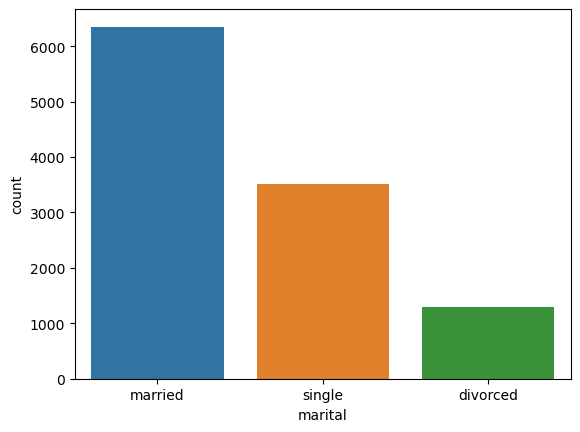

In [24]:
# count the number of customers based on their marital status
sns.countplot(x = "marital", data = banking_data)

married people account for the highest number of customers, while the divorced ones represent the least number of customers

<Axes: xlabel='education', ylabel='count'>

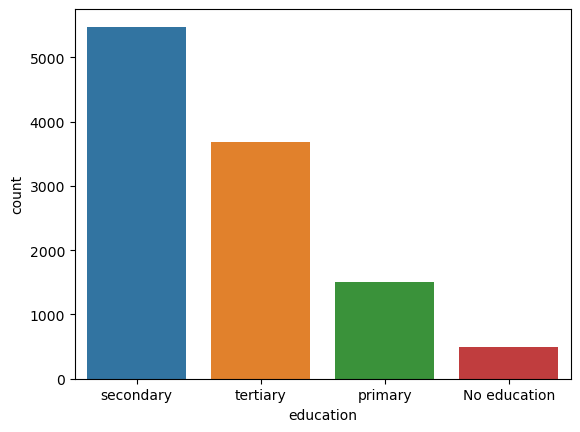

In [25]:
# count the number of customers based on the education level
sns.countplot(x = "education", data = banking_data)

most of the bank's customers have attained the secondary level of education, while no education represent the least number of customers.

<Axes: xlabel='housing', ylabel='count'>

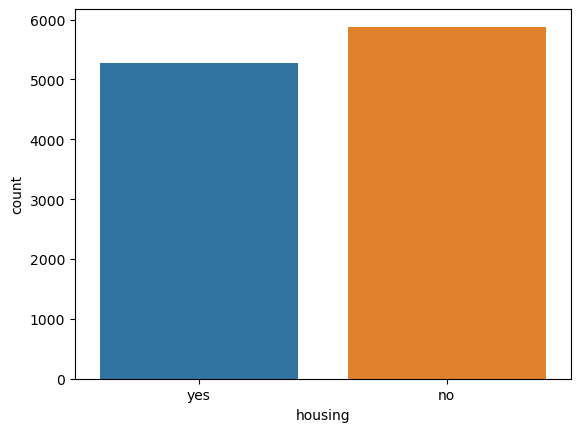

In [27]:
#  Check whether the customers have housing loans
sns.countplot(x = "housing", data = banking_data)

The plot clearly shows that the majority of the customers have no housing loans

<Axes: xlabel='loan', ylabel='count'>

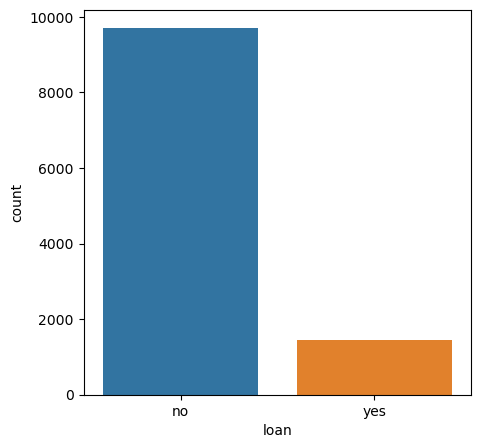

In [28]:
# check if the customers have existing personal loans
plt.figure(figsize=[5,5])
sns.countplot(x = "loan", data = banking_data)

Majority of the customers have no personal loans

<Axes: xlabel='deposit', ylabel='count'>

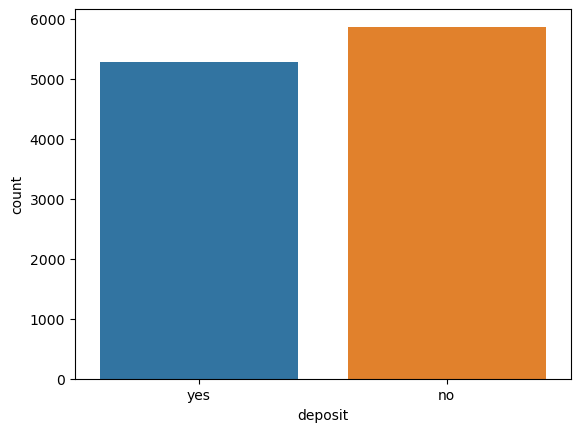

In [29]:
# Check if the customers will agree to make deposits
sns.countplot(x = "deposit", data = banking_data)

Majority of the customers would not agree to make deposits with the bank

<Axes: xlabel='contact', ylabel='count'>

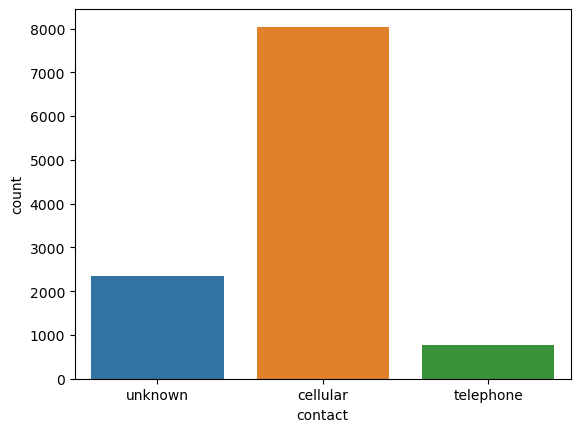

In [31]:
#  Check the mode of contact used when reaching the customers
sns.countplot(x = "contact", data = banking_data)

Cellular contact is the most utilized mode of contact to reach the customers

<Axes: xlabel='poutcome', ylabel='count'>

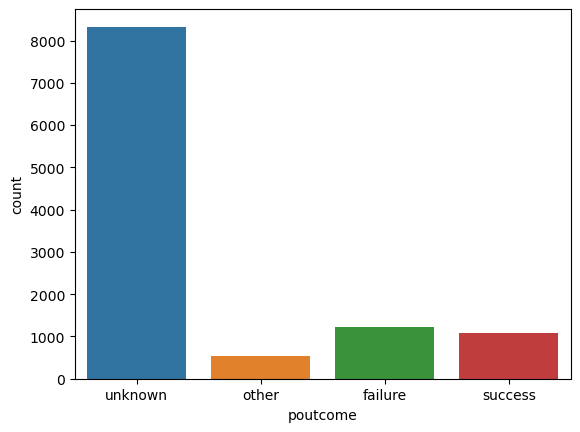

In [32]:
#  Check the outcome of phonecalls made to the customers
sns.countplot(x = "poutcome", data = banking_data)

Unknown accounts for the highest outcome while other accounts for the least outcome. The 'unknown' and 'other' values pose a problem of bias hence inccurate insights.

However, the bank had a lot of failure in its campaign to drive deposits

<Axes: xlabel='marital'>

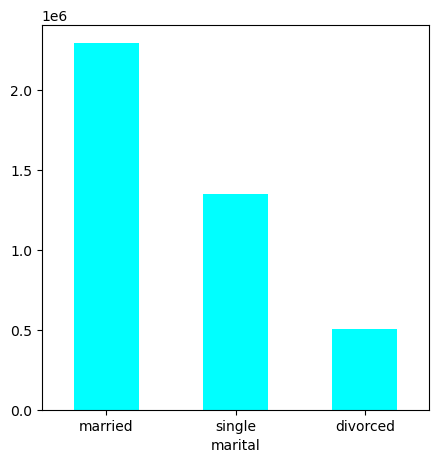

In [35]:
# Analysis of marital status and education
banking_data[["marital","duration"]].groupby("marital").sum().sort_values(by="duration", ascending = False).plot(kind = "bar", figsize = (5,5), legend = None, color = "cyan", rot = 0)

The bank has taken a the highest number of duration to contact married customers as compared to the divorced customers

<Axes: xlabel='education'>

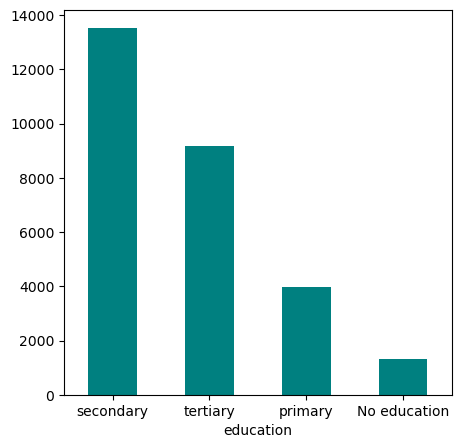

In [37]:
# Check the total number of campaigns per education level
banking_data[["education","campaign"]].groupby("education").sum().sort_values(by = "campaign", ascending = False).plot(kind = "bar", figsize = (5,5), legend = None, color = "teal", rot = 0)

The plot demonstrates that people wit no eductaion are the most likely to accept campaigns as compared to the ones who had reahed secondary level

Text(0.5, 1.0, 'customers who are likely to deposit with the bank based on their education level')

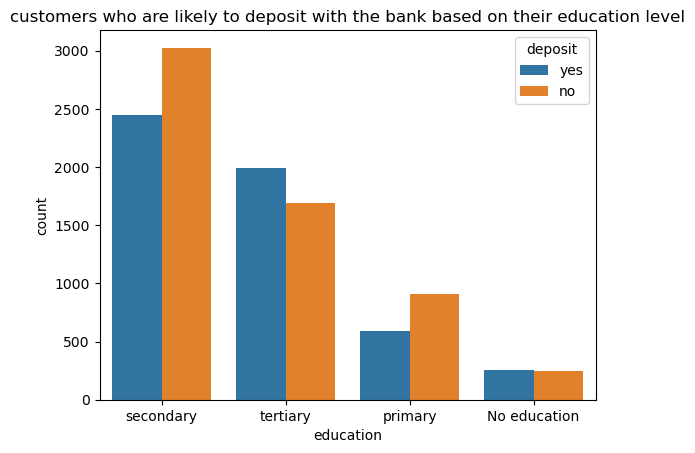

In [42]:
# Customers who are most likely to deposit with the bank based on the education level
sns.countplot(x="education", hue="deposit", data = banking_data)
plt.title("customers who are likely to deposit with the bank based on their education level")

The plot shows that people with tertiary education are more likely to deposit with the company as compared to those with secondary and primary education.

Text(0.5, 1.0, 'Loan based on marital status')

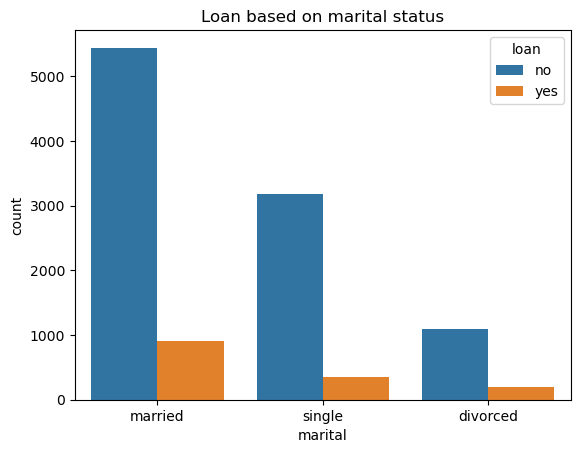

In [43]:
# check on customers with personal loans based on marital status
sns.countplot(x = "marital", hue = "loan", data = banking_data)
plt.title("Loan based on marital status")

The plot shows that every customer in every marital status do not have any personal loan

Text(0.5, 1.0, 'Loan defaulters by marital status')

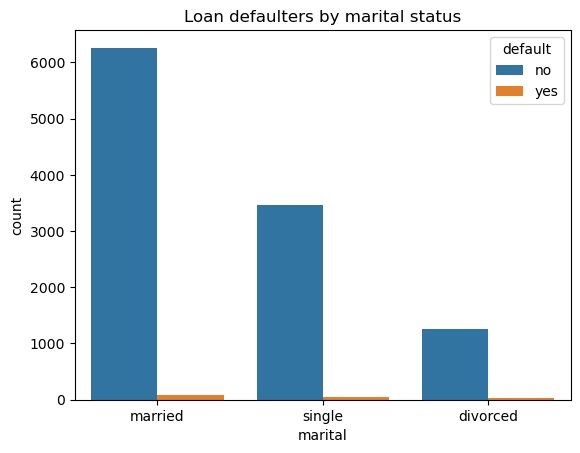

In [44]:
# loan defaulters based on marital status
sns.countplot(x = "marital", hue = "default", data = banking_data)
plt.title("Loan defaulters by marital status")

Married people account for the largest group of loan non-defaulters in the bank while divorced people account for the least group of loan non-defaulters.

Text(0.5, 1.0, 'Loan defaulters based on education')

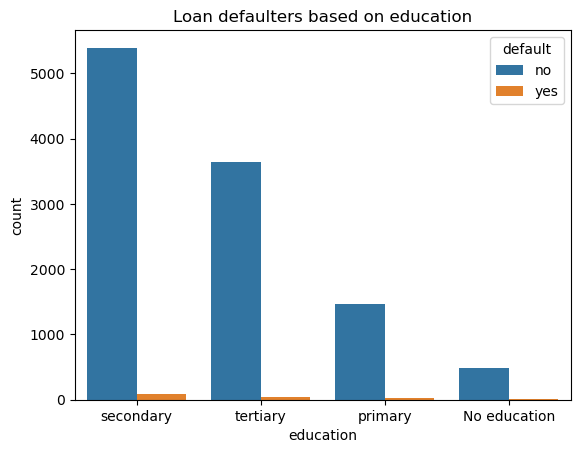

In [45]:
# Loan defaulters based on education
sns.countplot(x = "education", hue = "default", data = banking_data)
plt.title("Loan defaulters based on education")

People with secondary education make up the largest group of loan non-defaulters.

Text(0.5, 1.0, 'Phone outcomes based on the customers job')

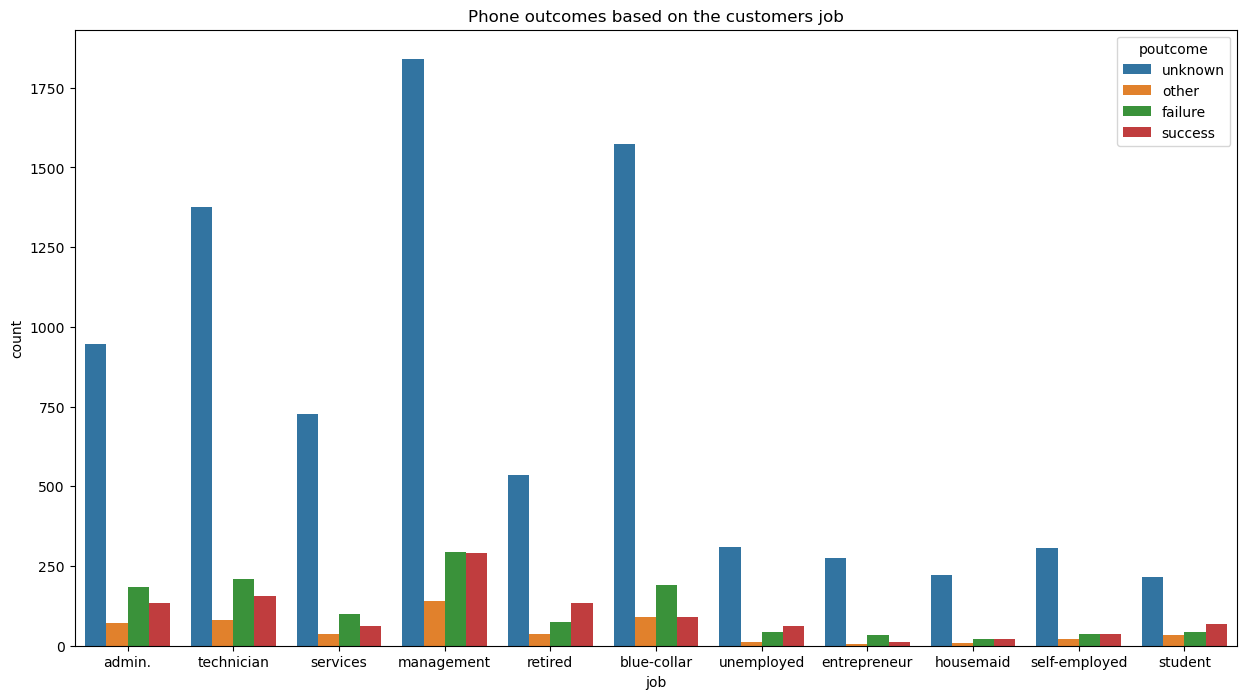

In [48]:
# Check for phone outcomes based on the customer's job
plt.figure(figsize=(15,8))
sns.countplot(x = "job", hue = "poutcome", data = banking_data)
plt.title("Phone outcomes based on the customers job")

The plot shows that the most common outcome for customers in all jobs is unknown with those in management taking up the highest proportion.

Text(0.5, 1.0, 'customers most likely to deposit with the bank')

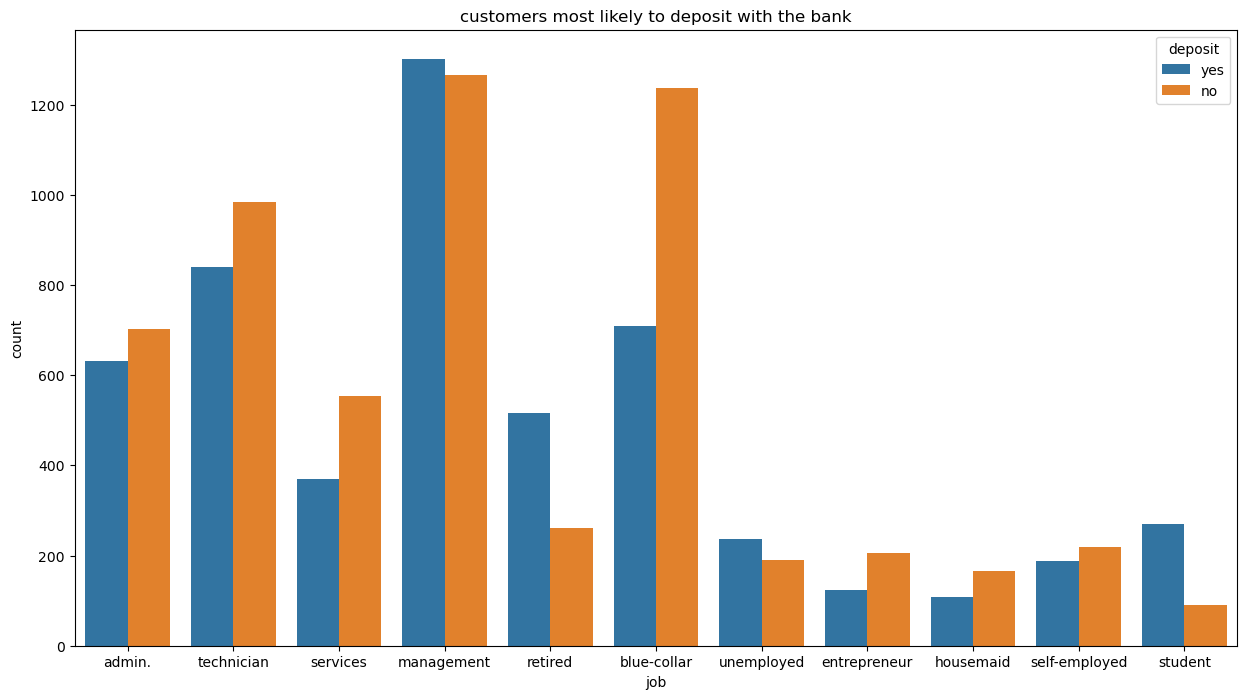

In [49]:
# Check the customers based on their jobs who are most likely to deposit with the bank
plt.figure(figsize=(15,8))
sns.countplot(x= "job", hue = "deposit", data = banking_data)
plt.title("customers most likely to deposit with the bank")

The people in management are more likely to accept to deposit with the bank as compared to housemaids. Also, people in blue-collar jobs had the highest number of people refusing to deposit with the bank.

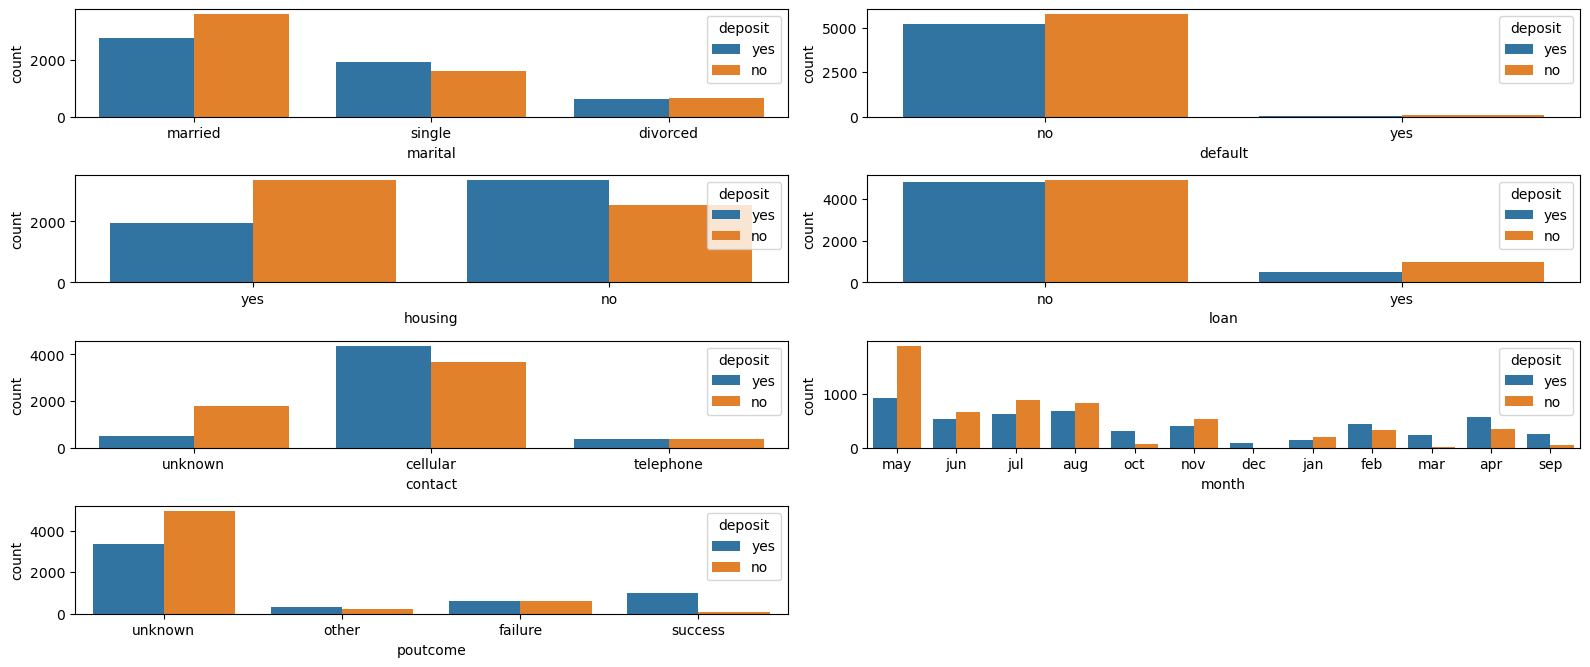

In [51]:
col_cat=['marital','default','housing','loan','contact','month','poutcome']
banking_data[col_cat]
plt.figure(figsize=(16,8))
for i,features in enumerate(banking_data[col_cat]):
    plt.subplot(5,2,i+1)
    sns.countplot(x=features,hue='deposit',data=banking_data)
plt.tight_layout() 
plt.show()

<Axes: xlabel='month', ylabel='count'>

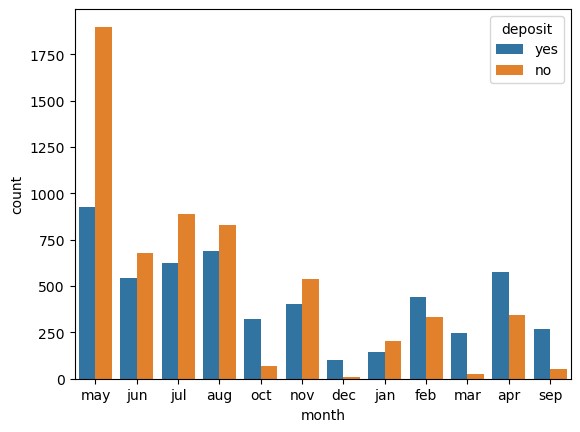

In [52]:
# The month which the customer is most likely to make a deposit in their accounts
sns.countplot(x = "month", hue = "deposit", data = banking_data)

Compared to every other month, more customers agreed that they would deposit in April since majority said 'yes' as compared to those that said 'no'.

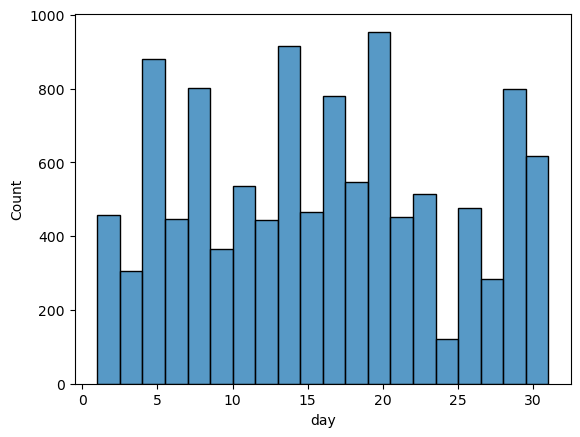

In [53]:
sns.histplot(banking_data, x="day", bins=20)
plt.show()

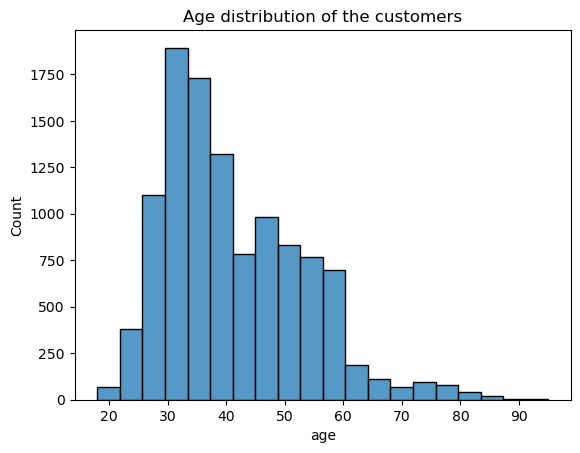

In [54]:
# check for the age distribution
sns.histplot(banking_data, x = "age", bins=20)
plt.title("Age distribution of the customers")
plt.show()

Majority of the bank's customers are between 30-40 years old while the oldest range between 60-95 years old

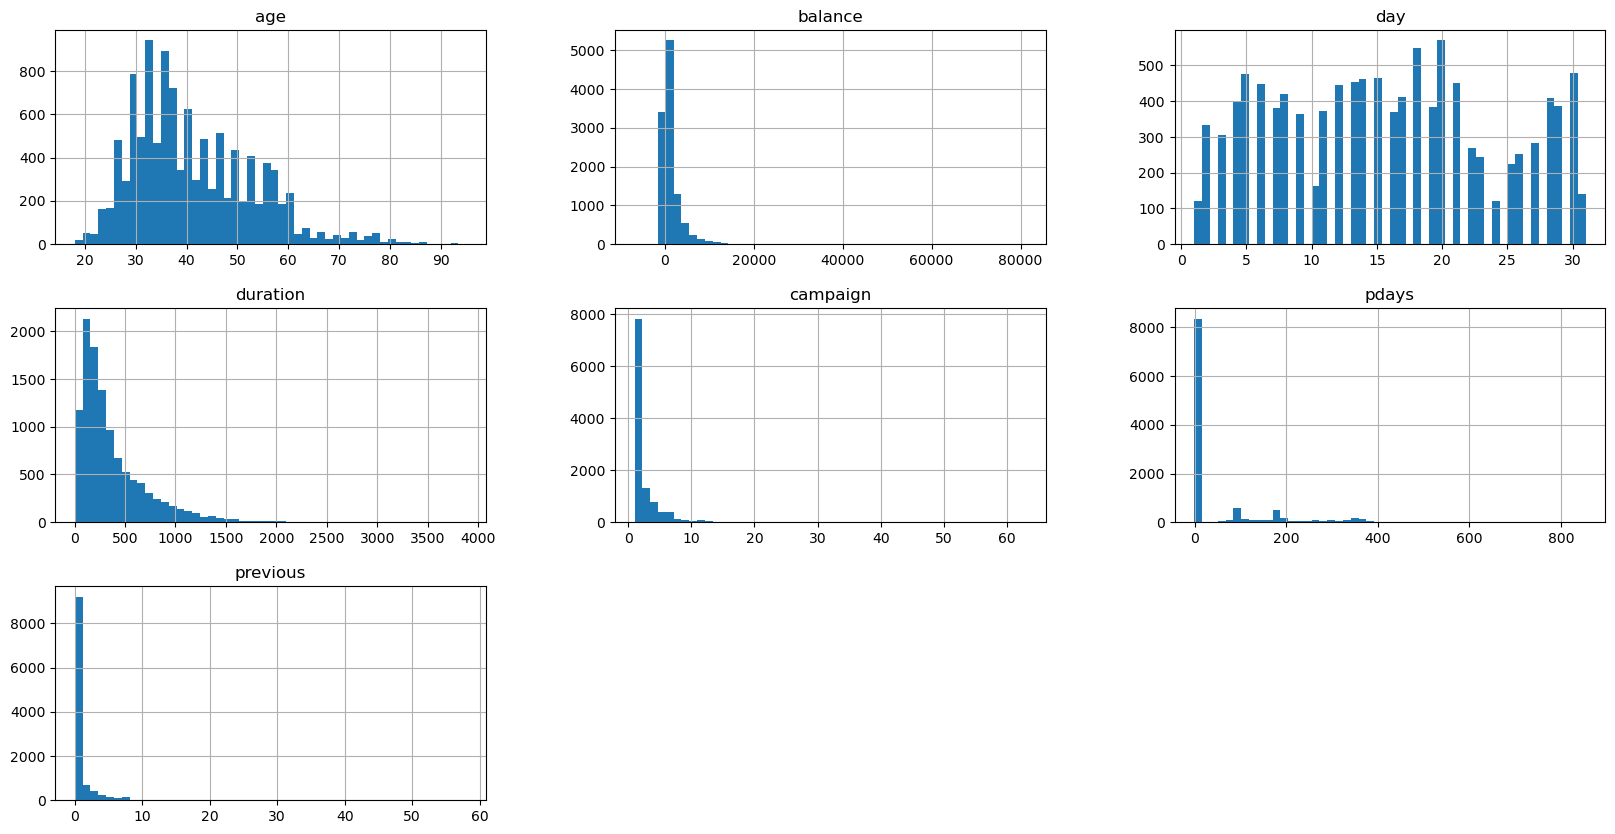

In [55]:
# check the distribution of numerical columns in the dataset
banking_data.hist(bins=50, figsize=(20,10))
plt.show()

The histograms are skewed to the right since the peak of the graphs are in the left side of the centre of the graphs. It can also be said to be a positively skewed histogram.

# Insights

1.Married people account for the highest number of cutomers while divorced people are the least.

2.The bank's highest customers have attained secondary education while the least have no education

3.Majority of the customers have neither housing loans nor personal loans

4.Non-bank defaulters make up the largest proportion of the bank's customers

5.The people in management are more likely to accept to deposit with the bank as compared to housemaids. Also, people in blue-collar jobs had the highest number of people refusing to deposit with the bank.

6.People with secondary education make up the largest group of loan non-defaulters.

7.Customers with tertiary education are more likely to deposit with the company as compared to those with secondary and primary education.

8.Majority of the bank's customers are between 30-40 years old while the oldest range between 60-95 years old.